In [1]:
from os import path
import sys
sys.path.append("../..")
import tess_cpm
import numpy as np
import matplotlib.pyplot as plt
# from astropy.io import fits
# from astropy.wcs import WCS
# from astroquery.mast import Tesscut
# from astropy.coordinates import SkyCoord
# import lightkurve as lk

In [2]:
plt.rcParams["figure.figsize"] = (12, 8)

In [3]:
sn_file = "../../supernovae/tess-s0001-4-1_64.525833_-63.615669_100x100_astrocut.fits"

In [4]:
sn = tess_cpm.Source(sn_file)

Removing 15 bad data points (out of 1282) using the TESS provided QUALITY array


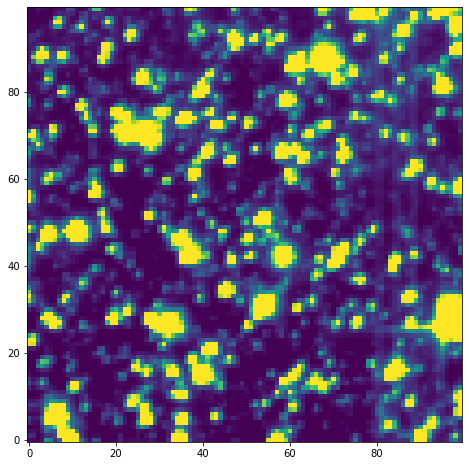

TypeError: plot_cutout() got an unexpected keyword argument 'rowrange'

In [5]:
sn.plot_cutout()
sn.plot_cutout(rowrange=[48, 53], colrange=[48, 53])

In [ ]:
sn.set_aperture(rowrange=[49, 52], colrange=[49, 52])
sn.plot_cutout(rowrange=[48, 53], colrange=[48, 53], show_aperture=True)

In [ ]:
sn.plot_pix_by_pix()

In [ ]:
sn.add_cpm_model()
sn.add_poly_model()
sn.set_regs([0.5, 1.0])
sn.holdout_fit_predict(k=3);

In [ ]:
sn.plot_pix_by_pix(split=True, data_type="cpm_prediction")
sn.plot_pix_by_pix(split=True, data_type="poly_model_prediction")
sn.plot_pix_by_pix(split=True, data_type="cpm_subtracted_lc")

In [6]:
detrended_lc = sn.get_aperture_lc(data_type="cpm_subtracted_lc")
plt.plot(sn.time, detrended_lc, ".", c='k');

TypeError: object of type 'NoneType' has no len()

In [ ]:
sn.rescale()
rescaled_detrended_lc = sn.get_aperture_lc(data_type="rescaled_cpm_subtracted_lc")
plt.plot(sn.time, rescaled_detrended_lc, ".", c='k');

In [ ]:
import lightkurve as lc

In [ ]:
a = lc.TessLightCurve(time=sn.time, flux=detrended_lc)

In [ ]:
a.plot()

In [ ]:
a.estimate_cdpp()

In [ ]:
x = np.arange(5)
y = np.arange(5, 10)
xx, yy = np.meshgrid(x, y)

In [ ]:
cpm_regs = 0.1 * np.arange(1, 10)
poly_regs = 0.1 * np.arange(1, 5)

In [ ]:
# cdpps = []
# for creg in cpm_regs:
#     cdpp_preg = []
#     for preg in poly_regs:
#         sn.set_regs([creg, preg])
#         sn.holdout_fit_predict()
#         cdpp_preg.append(lc.TessLightCurve(sn.time, sn.get_aperture_lc(data_type="cpm_subtracted_lc", verbose=False)).estimate_cdpp())
#     cdpps.append(cdpp_preg)

In [ ]:
b = np.array(cdpps)
b